In [1]:
#first I import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint



In [2]:
# Install kagglehub package
%pip install kagglehub

# Next I import the dataset
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ethancratchley/email-phishing-dataset")
#datapath from the kaggle website to import the dataset

import os

# List files in the downloaded dataset directory to confirm the file name
print("Files in dataset directory:", os.listdir(path))

# Load the dataset into a pandas DataFrame
# Confirm the correct file name by listing files in the directory
files_in_directory = os.listdir(path)
print("Files in dataset directory:", files_in_directory)

# Use the correct file name from the directory listing
file_name = files_in_directory[0]  # Assuming the first file is the correct one
email_data = pd.read_csv(os.path.join(path, file_name))

# I use the head function to see the first 5 rows of the dataset
print(email_data.head())


Note: you may need to restart the kernel to use updated packages.


/home/codespace/.python/current/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Files in dataset directory: ['email_phishing_data.csv']
Files in dataset directory: ['email_phishing_data.csv']
   num_words  num_unique_words  num_stopwords  num_links  num_unique_domains  \
0        140                94             52          0                   0   
1          5                 5              1          0                   0   
2         34                32             15          0                   0   
3          6                 6              2          0                   0   
4          9                 9              2          0                   0   

   num_email_addresses  num_spelling_errors  num_urgent_keywords  label  
0                    0                    0                    0      0  
1                    0                    0                    0      0  
2                    0                    0                    0      0  
3                    0                    0                    0      0  
4                    0               

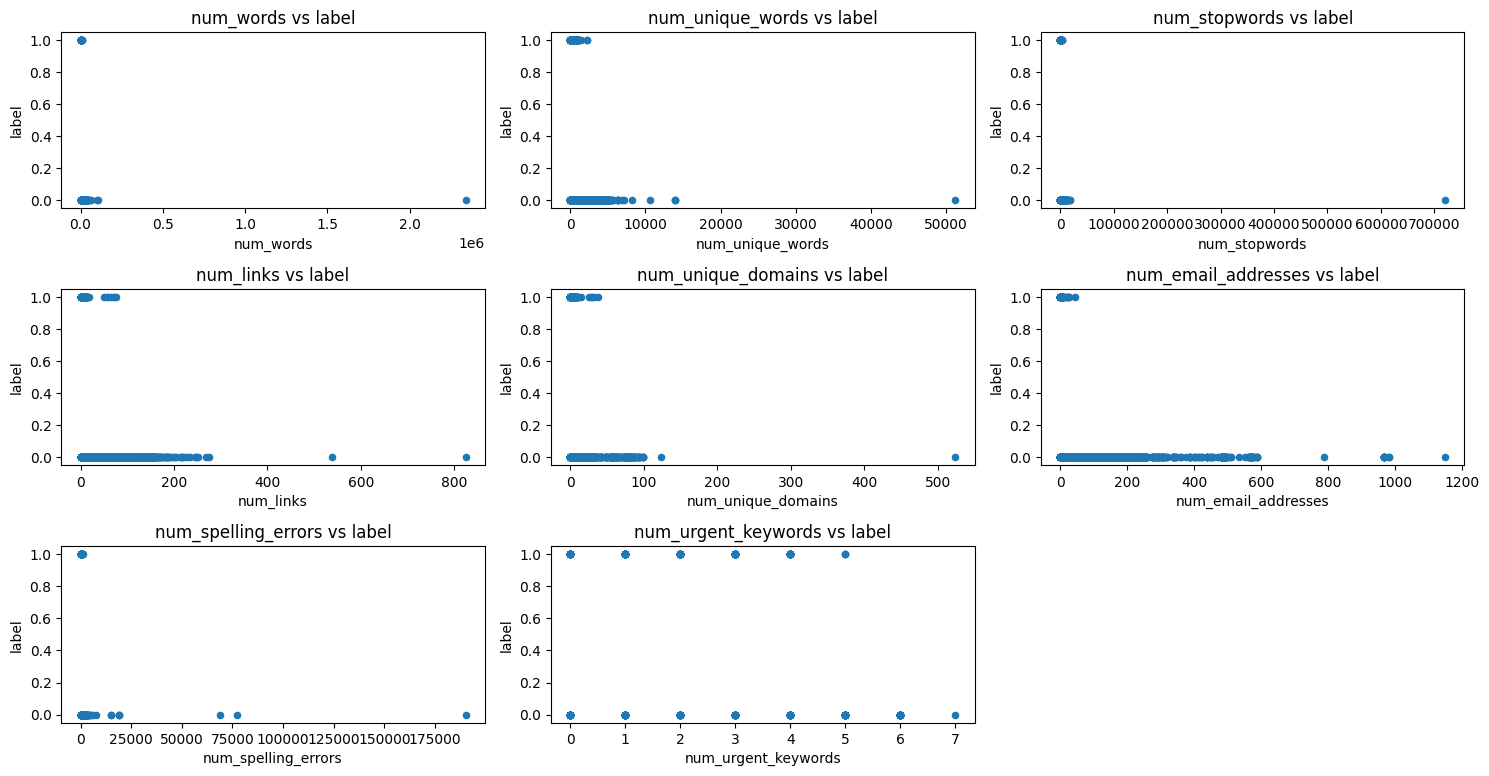

In [3]:
def mse(model, X, y):
    y_hat = model.predict(X)
    err = np.mean((y - y_hat)**2) #error is AKA loss of model
    return err
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(email_data.columns[:-1]):  # Exclude the target column
    email_data.plot(kind='scatter', x=col, y='label', ax=axes[i])
    axes[i].set_title(f'{col} vs label')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#visualize the dataset


Mean Squared Error: 0.013131453796169538
Accuracy: 0.9866914356482804
Confusion Matrix:


<Axes: >

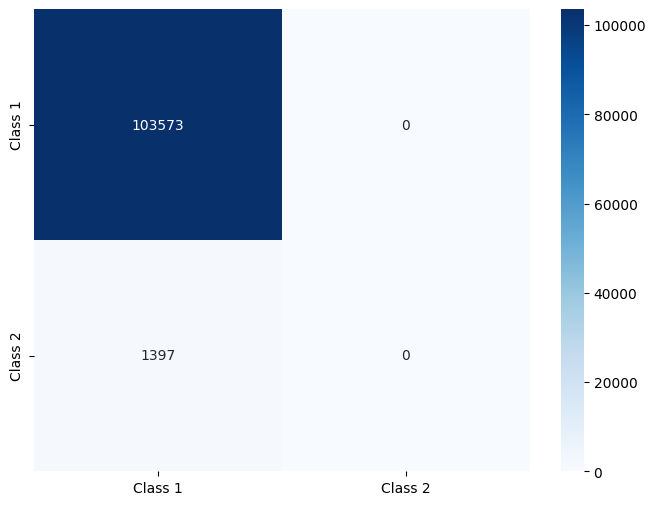

In [4]:
#training model with linear regression using lasso to avoid overfitting
X = email_data.drop('label', axis=1)
y = email_data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create a pipeline with polynomial features and Lasso regression
pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2)),
    ('scaler', StandardScaler()),
    ('lasso', Lasso(alpha=0.1))
])
# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)
# Make predictions on the test set
y_pred = pipeline.predict(X_test)
# Calculate the mean squared error
mse_value = mse(pipeline, X_test, y_test)
print(f'Mean Squared Error: {mse_value}')
# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred.round())
print(f'Accuracy: {accuracy}')
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred.round())
print('Confusion Matrix:')
conf_matrix = confusion_matrix(y_test, y_pred.round())
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
             xticklabels=['Class 1', 'Class 2'], yticklabels=['Class 1', 'Class 2'])

#after model training I use confusion matrix and MSE to evaluate the model

#based on the results the model is performing well for class 1 but fails for class 2 as it is mislabeling all class 2 as class 1

SVM Mean Squared Error: 0.013308564351719539
SVM Accuracy: 0.9866914356482804
SVM Confusion Matrix:


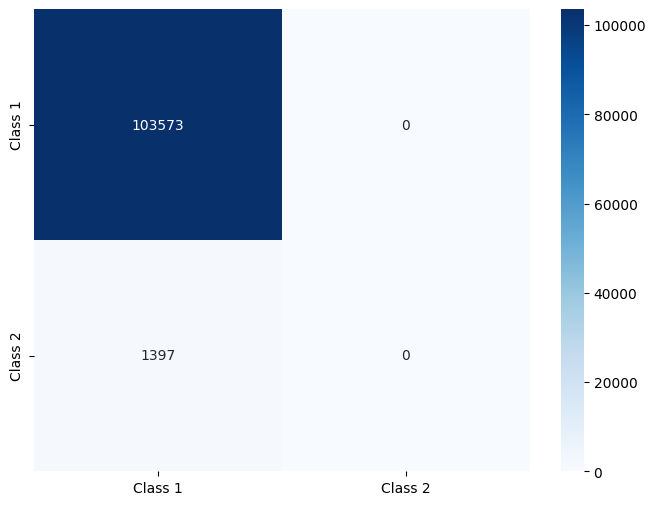

In [ ]:
#now to run the model with SVM to see if there is improvement
# Split the dataset into features and target variable

# Initialize the SVM model
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

# Train the SVM model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
svm_predictions = svm_model.predict(X_test)

# Calculate the mean squared error for SVM using the mse function
svm_mse_value = mse(svm_model, X_test, y_test)
print(f'SVM Mean Squared Error: {svm_mse_value}')

# Calculate the accuracy score
svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f'SVM Accuracy: {svm_accuracy}')

# Create a confusion matrix
svm_conf_matrix = confusion_matrix(y_test, svm_predictions)
print('SVM Confusion Matrix:')
plt.figure(figsize=(8, 6))
sns.heatmap(svm_conf_matrix, annot=True, fmt='d', cmap='Blues',
             xticklabels=['Class 1', 'Class 2'], yticklabels=['Class 1', 'Class 2'])
plt.show()


# The SVM model performs the same as the lasso regression model, they have the same accuracy and MSE as well as the confusion matrix
# both models are mislabeling class 2 as class 1
#which could be due to the dataset being imbalanced 
#overall both models performed well considering, as all the class 1 were predicted correctly